In [1]:
'''
File name: news_channel.py
Author: Loïc Fischer
Date created: 05/11/2022
Date last modified: 18/11/2022
Python Version: 3.9.13
'''

'\nFile name: news_channel.py\nAuthor: Loïc Fischer\nDate created: 05/11/2022\nDate last modified: 18/11/2022\nPython Version: 3.9.13\n'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import json
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


Import of data

In [3]:
PATH                = 'D:/Ada/'
DATA_CHANNEL        = 'df_channels_en.tsv.gz'
DATA_VIDEO_META     = 'yt_metadata_en.jsonl.gz'
DATA_COMMENT        = 'youtube_comments.tsv.gz'
NUM_COMMENT         = 'num_comments.tsv.gz'
COMPRESSION         = 'gzip'
SEPARATOR           = '\t'

df_channels   = pd.DataFrame()
df_video_meta = pd.DataFrame()
df_comments   = pd.DataFrame()

# Read data from memory and clean it
df_channels = pd.read_csv(os.path.join(PATH,DATA_CHANNEL), compression=COMPRESSION,sep=SEPARATOR)
df_channels = df_channels.dropna()

# Read data from memory and clean it
df_video_meta = pd.read_json(os.path.join(PATH,DATA_VIDEO_META), compression=COMPRESSION,lines=True, nrows=10000)
df_video_meta = df_video_meta.dropna()

# Read data from memory and clean it
df_comments = pd.read_csv(os.path.join(PATH,DATA_COMMENT),sep=SEPARATOR,nrows=1e6)
df_comments = df_comments.dropna()

# Display of the imported datasets
df_video_meta.head()
df_channels.head(5)
df_comments.head(5)

## Note: only partial data have been imported for a faster processing time.


,categories,channel_id,crawl_date,description,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count
0,Film & Animation,UCzWrhkg9eK5I8Bm3HfV-unA,2019-10-31 20:19:26.270363,Lego City Police Lego Firetruck Cartoons about...,1.0,SBqSc91Hn9g,1159,8.0,"lego city,lego police,lego city police,lego ci...",Lego City Police Lego Firetruck Cartoons about...,2016-09-28 00:00:00,1057
1,Film & Animation,UCzWrhkg9eK5I8Bm3HfV-unA,2019-10-31 20:19:26.914516,Lego Marvel SuperHeroes Lego Hulk Smash Iron-M...,1.0,UuugEl86ESY,2681,23.0,"Lego superheroes,lego hulk,hulk smash,lego mar...",Lego Marvel SuperHeroes Lego Hulk Smash Iron-M...,2016-09-28 00:00:00,12894
2,Film & Animation,UCzWrhkg9eK5I8Bm3HfV-unA,2019-10-31 20:19:26.531203,Lego City Police Lego Fireman Cartoons about L...,779.0,oB4c-yvnbjs,1394,1607.0,"lego city,lego police,lego city police,lego fi...",Lego City Police Lego Fireman Cartoons about L...,2016-09-28 00:00:00,1800602
3,Film & Animation,UCzWrhkg9eK5I8Bm3HfV-unA,2019-10-31 20:19:28.335329,Lego Harry Potter Complete Lego New Movie for ...,24.0,ZaV-gTCMV8E,5064,227.0,"Lego harry potter,new harry potter,harry potte...",Lego Harry Potter Complete Lego New Movie for ...,2016-09-28 00:00:00,57640
4,Film & Animation,UCzWrhkg9eK5I8Bm3HfV-unA,2019-10-31 20:19:30.328487,Lego City Police LONG VIDEO for kids Lego Fire...,13.0,cGvL7AvMfM0,3554,105.0,"lego city,lego police,lego city police,lego fi...",Lego City Police 1 HOUR LONG VIDEO for kids Le...,2016-09-28 00:00:00,86368


,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
0,Gaming,2010-04-29,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,101000000,3956,3.0,2.087
1,Education,2006-09-01,UCbCmjCuTUZos6Inko4u57UQ,Cocomelon - Nursery ...,60100000,458,7.0,2.087
2,Entertainment,2006-09-20,UCpEhnqL0y41EpW2TvWAHD7Q,SET India,56018869,32661,8.0,2.087
3,Howto & Style,2016-11-15,UC295-Dw_tDNtZXFeAPAW6Aw,5-Minute Crafts,60600000,3591,9.0,2.087
4,Sports,2007-05-11,UCJ5v_MCY6GNUBTO8-D3XoAg,WWE,48400000,43421,11.0,2.087


,author,video_id,likes,replies
0,1,Gkb1QMHrGvA,2,0
1,1,CNtp0xqoods,0,0
2,1,249EEzQmVmQ,1,0
3,1,_U443T2K_Bs,0,0
4,1,rJbjhm0weYc,0,0


### Merging
During the merge, the parameter dataset as to be define either as "ft" for the featured medias or as "all" to choose all the medias on Allsides

In [5]:
# Merging the dataset from Allside and the one from Youniverse

dataset="ft" # Choose the dataset : "ft" or "all"

df_channels_md=pd.DataFrame()
df_media=pd.DataFrame()

if dataset=="all":
    df_media=pd.read_csv('csv/media_all_raw.csv',index_col=0)
elif dataset=="ft":
    df_media=pd.read_csv('csv/media_ft_raw.csv',index_col=0)
else:
    print("You need to choose a dataset")

df_channels['name_cc']=df_channels['name_cc'].str.casefold()
df_media['name']=df_media['name'].str.casefold()

#df_channels_md=df_channels[(df_channels['name_cc'].isin(df_media['name']))]
#df_channels_md=df_channels_md[df_channels_md['subscribers_cc']>1e6]
#df_channels_md=df_channels_md.reset_index(drop=True)


merged_inner = pd.merge(left=df_channels, right=df_media, left_on='name_cc', right_on='name')
merged_inner = merged_inner.drop(['name'], axis=1)
merged_inner = merged_inner.sort_values(by=['name_cc'])
merged_inner = merged_inner.reset_index(drop=True)
merged_inner = merged_inner.drop_duplicates()
#merged_inner = merged_inner[merged_inner['subscribers_cc']>1e6]

merged_inner.head(5)

#merged_inner.loc[merged_inner['name_cc'].duplicated(False)]
if dataset=="all":
    merged_inner.to_csv('csv/channels_yt_all_test.csv')
elif dataset=="ft":
    merged_inner.to_csv('csv/channels_yt_ft_test.csv')
else:
    print("You need to choose a dataset")

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights,orrientation,confidence,commu_agree,commu_disagree
0,News & Politics,2006-08-07,UCBi2mrWuNuyYy4gbM6fU18Q,abc news,6640000,48869,978.0,2.0870,Lean Left,High,39305,19628
1,News & Politics,2006-09-18,UC52X5wxOL_s5yw0dQk7NtgA,associated press,1040000,129072,14780.0,2.7865,Lean Left,Medium,31888,24899
2,News & Politics,2006-04-08,UC16niRr50-MSBwiO3YDb3RA,bbc news,5190000,10459,1531.0,2.0870,Center,Medium,32350,27774
3,News & Politics,2006-03-09,UCUMZ7gohGI9HcU9VNsr2FJQ,bloomberg,1800000,47804,6697.0,2.4925,Lean Left,Medium,17399,22461
4,News & Politics,2015-02-24,UCmgnsaQIK1IR808Ebde-ssA,breitbart news,137000,2210,117307.0,4.5410,Right,High,42400,11748


In [ ]:
## using the method contains

#df3 = pd.merge(left=df_channels, right=df_media, left_on='name_cc', right_on='name')
#df3=df_channels[(df_channels['name_cc'].str.contains('|'.join(df_media['name'])))&(df_channels['category_cc']=='News & Politics')&(df_channels['subscribers_cc']>1e5)]

#'|'.join(df_media['name'])

In [ ]:
## gettint all the channel with string inside

#for ind1 in df_media.index:
#   df_media.loc[ind1, 'name_cc'] = ', '.join(list(df_channels_news[df_channels_news['name_cc'].str.contains(df_media['name'][ind1])]['name_cc']))
#with pd.option_context('display.max_rows', None,):
#    df_media[df_media['name_cc'].str.len() > 0]

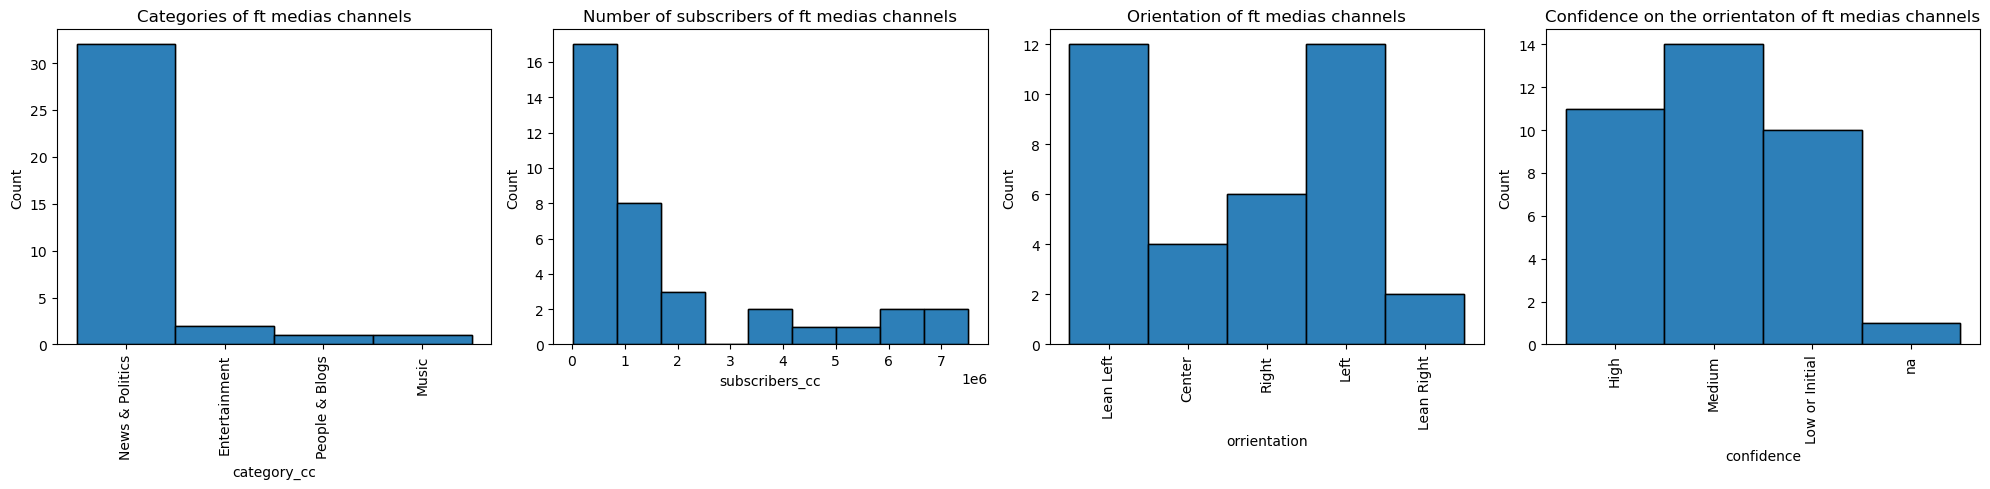

In [6]:


fig, axs = plt.subplots(1,4, figsize=(20,5));

sns.histplot(data=merged_inner, x='category_cc', ax=axs[0]).tick_params('x', labelrotation=90)
sns.histplot(data=merged_inner, x='category_cc', ax=axs[0]).title.set_text("Categories of {} medias channels".format(dataset))

sns.histplot(data=merged_inner, x='subscribers_cc', ax=axs[1]);
sns.histplot(data=merged_inner, x='subscribers_cc', ax=axs[1]).title.set_text("Number of subscribers of {} medias channels".format(dataset));

sns.histplot(data=merged_inner, x='orrientation', ax=axs[2]).tick_params('x', labelrotation=90);
sns.histplot(data=merged_inner, x='orrientation', ax=axs[2]).title.set_text("Orientation of {} medias channels".format(dataset))

sns.histplot(data=merged_inner, x='confidence', ax=axs[3]).tick_params('x', labelrotation=90);
sns.histplot(data=merged_inner, x='confidence', ax=axs[3]).title.set_text("Confidence on the orrientaton of {} medias channels".format(dataset))


plt.tight_layout();
plt.savefig('figures/hist_{}.png'.format(dataset));



In [8]:
def test_channel_name(testword,news=True):
    with pd.option_context('display.max_rows',None,'display.max_columns', None,'display.max_colwidth',4000):
        if news == True:
            return df_channels[(df_channels['name_cc'].str.contains(testword.casefold()))&(df_channels['category_cc']=='News & Politics')]
        else:
            return df_channels[(df_channels['name_cc'].str.contains(testword.casefold()))]

In [7]:

def test_channel_id(testword):
    with pd.option_context('display.max_rows',None,'display.max_columns', None,'display.max_colwidth',4000):
        return df_channels[(df_channels['channel'].str.contains(testword.casefold()))]

